In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 資料讀取
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 重複次數
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 取得小批次
    batch_mask = np.random.choice(train_size, batch_size)   # 從訓練樣本中隨機選取n個樣本數量， n = batch_size
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 計算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)  # 梯度下降法(所有樣本) 
    grad = network.gradient(x_batch, t_batch)             # SGD隨機梯度下降法
    
    # 參數更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
#         print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        print(f"train acc, test acc |  {train_acc:.3f},  {test_acc:.3f}")

train acc, test acc |  0.097,  0.098
train acc, test acc |  0.776,  0.778
train acc, test acc |  0.877,  0.881
train acc, test acc |  0.898,  0.903
train acc, test acc |  0.907,  0.912
train acc, test acc |  0.914,  0.916
train acc, test acc |  0.920,  0.922
train acc, test acc |  0.922,  0.924
train acc, test acc |  0.927,  0.930
train acc, test acc |  0.930,  0.931
train acc, test acc |  0.934,  0.935
train acc, test acc |  0.936,  0.937
train acc, test acc |  0.939,  0.938
train acc, test acc |  0.941,  0.940
train acc, test acc |  0.943,  0.942
train acc, test acc |  0.945,  0.943
train acc, test acc |  0.947,  0.945


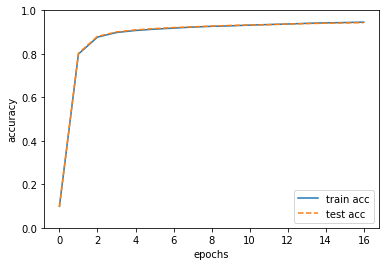

In [10]:
# 圖形呈現
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

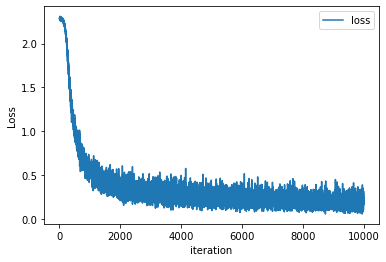

In [30]:
plt.plot(train_loss_list, label='loss')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.show()